## Fake News Detector

Autor: Joshua Kabwanga

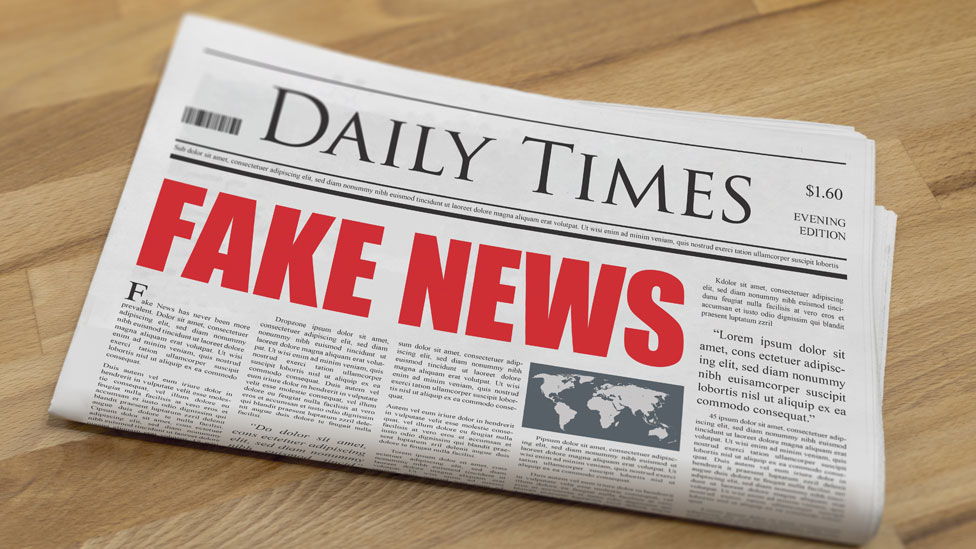


 Installing python Libraries

In [1]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
import re
import string

Loading the data

In [4]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

View the fake news datasets

In [5]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


View the true news dataset

In [6]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Add a target column

In [7]:
fake_news['target'] = 0
true_news['target'] = 1

In [8]:
fake_news.shape, true_news.shape

((23481, 5), (21417, 5))

Combine the two dataset into one

In [9]:
data = pd.concat([fake_news, true_news], axis=0)

Reshuffling the all dataset

In [10]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)
data.head()

,title,text,subject,date,target
0,Clinton Extends Olive Branch To Sanders: We W...,With the Democratic nomination wrapping up in ...,News,"May 1, 2016",0
1,JAMES WOODS Has Social Media In Tears After Tw...,"Conservative Hollywood actor, James Woods, is ...",left-news,"Dec 9, 2017",0
2,Labor nominee Puzder's company wins discrimina...,WASHINGTON (Reuters) - Labor secretary nominee...,politicsNews,"February 9, 2017",1
3,Saudi Arabia will help Syrian opposition come ...,DUBAI (Reuters) - Saudi Foreign Minister Adel ...,worldnews,"November 22, 2017",1
4,"Paul Krugman, Top Economists: Bernie Sanders ...",It can be said that Senator Bernie Sanders is ...,News,"February 17, 2016",0


<ipython-input-11-5d3d0e0879e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'target', palette='rocket')


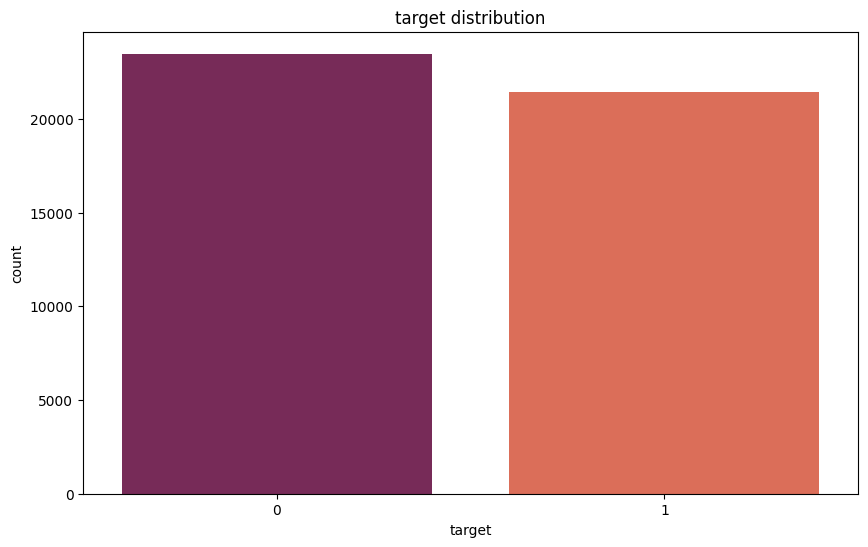

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'target', palette='rocket')
plt.title('target distribution')
plt.show()

Now let's check the distribution of the subject column

<ipython-input-12-5094915e1aee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x='subject', palette='rocket')


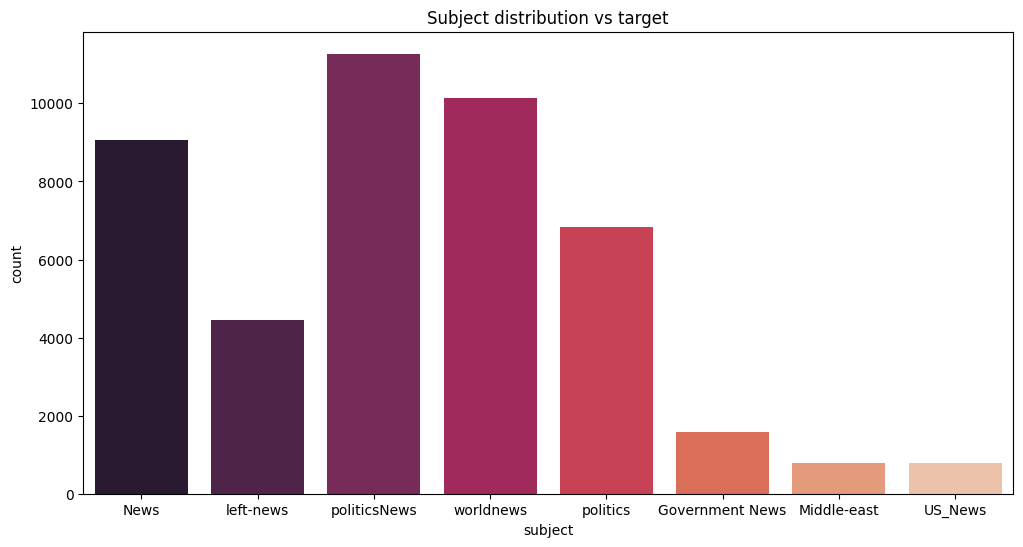

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data= data, x='subject', palette='rocket')
plt.title('Subject distribution vs target')
plt.show()

Remove unwated columns before training the data

In [13]:
data.drop(['title', 'subject', 'date'],axis=1, inplace=True)


let's check for duplicates values

In [14]:
data.duplicated().sum()


6251

we have 6251 duplicates value, the only way to forward here is to removed

In [15]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isna().sum()

text      0
target    0
dtype: int64

In [16]:
data.head(5)

,text,target
0,With the Democratic nomination wrapping up in ...,0
1,"Conservative Hollywood actor, James Woods, is ...",0
2,WASHINGTON (Reuters) - Labor secretary nominee...,1
3,DUBAI (Reuters) - Saudi Foreign Minister Adel ...,1
4,It can be said that Senator Bernie Sanders is ...,0


create a function to process the text column

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data["text"] = data["text"].apply(wordopt)

#### Defining dependent and independent variables

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
X= data["text"]
y = data["target"]


In [20]:
Xv_train, Xv_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(Xv_train)
X_test = vectorization.transform(Xv_test)

In [27]:
print(X_train)

  (0, 92575)	0.0346294502442182
  (0, 44721)	0.04475375480518308
  (0, 37298)	0.019337279310593217
  (0, 61593)	0.01512592744321068
  (0, 35261)	0.011488194889841753
  (0, 7307)	0.04212201873157536
  (0, 91419)	0.05035591993089614
  (0, 38159)	0.030749955133389642
  (0, 52201)	0.10193334087883488
  (0, 29459)	0.4661512060889243
  (0, 35096)	0.05641058268722695
  (0, 85491)	0.03291885880864288
  (0, 90243)	0.02141867308809077
  (0, 82442)	0.18464359617927498
  (0, 89469)	0.03161901443996718
  (0, 79298)	0.03256893542460833
  (0, 42425)	0.04293793392249806
  (0, 16549)	0.052786022507577204
  (0, 82415)	0.04704269554279059
  (0, 84977)	0.12474550662507979
  (0, 29835)	0.040217070918942235
  (0, 55564)	0.04198938271262165
  (0, 73564)	0.044632118891958686
  (0, 1178)	0.04595022014433802
  (0, 1541)	0.03188090238871138
  :	:
  (28984, 46172)	0.04367567543038458
  (28984, 68638)	0.05423303620729098
  (28984, 14921)	0.05229776478675847
  (28984, 72181)	0.04843288915994839
  (28984, 47574)	0.0

## Logistic regression model
* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [28]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [29]:
# Predict the class and the probability for each model
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

#Print out the predict set
y_pred.head()

,lr,l1,l2
0,0,0,0
1,1,1,1
2,0,0,0
3,1,1,1
4,0,0,0


In [30]:
y_prob.head()

,lr,l1,l2
0,0.739908,0.761092,0.993899
1,0.913715,0.989567,0.998621
2,0.996485,0.999852,1.000000
3,0.962466,0.999999,1.000000
4,0.992917,0.999980,1.000000


from matplotlib import pyplot as plt
_df_0['lr'].plot(kind='hist', bins=20, title='lr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['l1'].plot(kind='hist', bins=20, title='l1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['l2'].plot(kind='hist', bins=20, title='l2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='lr', y='l1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='l1', y='l2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['lr'].plot(kind='line', figsize=(8, 4), title='lr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['l1'].plot(kind='line', figsize=(8, 4), title='l1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['l2'].plot(kind='line', figsize=(8, 4), title='l2')
plt.gca().spines[['top', 'right']].set_visible(False)

For each model, calculate the following error metrics:

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [31]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:
    precission, recall, fscore, _ =score(y_test,y_pred[lab], average="weighted")
    # accuracy calculation
    accurary = accuracy_score(y_test, y_pred[lab])

    # Roc -auc score can br calculate by binarizing the data

    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]), label_binarize(y_pred[lab], classes=[0,1]), average="weighted")

    # confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision': precission, 'recall' :recall,
                                 'fscore': fscore, 'accurary' : accurary, 'auc': auc},
                                   name=lab))

metrics = pd.concat(metrics, axis=1)


In [32]:
metrics

,lr,l1,l2
precision,0.985170,0.995554,0.992980
recall,0.985096,0.995550,0.992962
fscore,0.985087,0.995549,0.992960
accurary,0.985096,0.995550,0.992962
auc,0.984404,0.995367,0.992628


from matplotlib import pyplot as plt
metrics['lr'].plot(kind='hist', bins=20, title='lr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['l1'].plot(kind='hist', bins=20, title='l1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['l2'].plot(kind='hist', bins=20, title='l2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='lr', y='l1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='l1', y='l2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['lr'].plot(kind='line', figsize=(8, 4), title='lr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['l1'].plot(kind='line', figsize=(8, 4), title='l1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['l2'].plot(kind='line', figsize=(8, 4), title='l2')
plt.gca().spines[['top', 'right']].set_visible(False)

Plot the confusion matrix for each mode

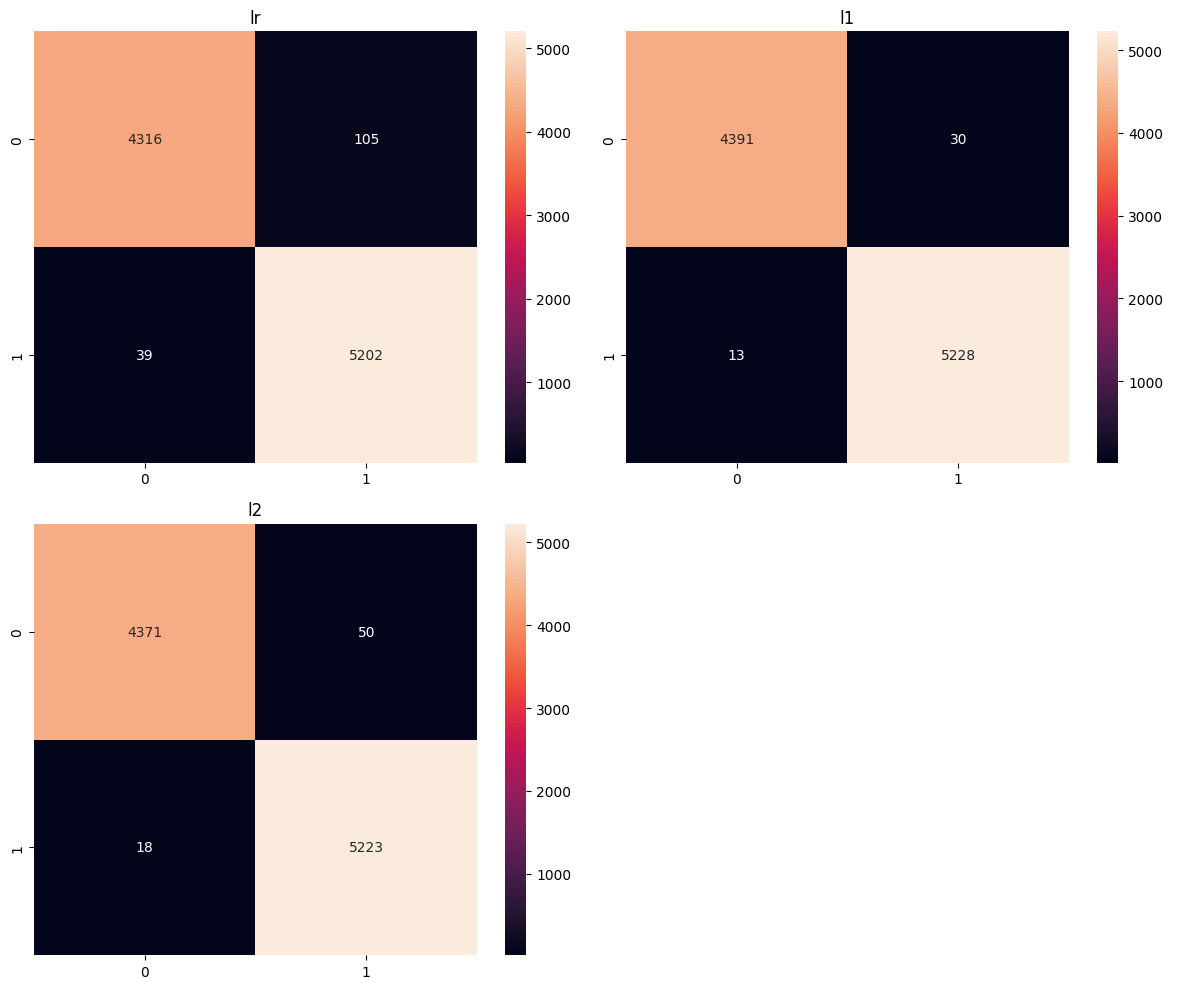

In [33]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax, lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()



## Build a SVM model with default parameters

The dataset has been splited the training and testing dataset.the above Training dataset will be used to train and tune models, and testing dataset will be used to evaluate the models. Note that you may also split a validation dataset from the training dataset for model tuning only.

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

fit the model

In [35]:
model = SVC(C=10, kernel='rbf')
model.fit(X_train, y_train.values.ravel())

SVC(C=10)

make predictions

In [36]:
preds = model.predict(X_test)

In [37]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [38]:
evaluate_metrics(y_test, preds)
print(classification_report(y_test,  preds))
print("Accuracy score", accuracy_score(y_test, preds))
print("f1_score", f1_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4421
           1       0.99      1.00      0.99      5241

    accuracy                           0.99      9662
   macro avg       0.99      0.99      0.99      9662
weighted avg       0.99      0.99      0.99      9662

Accuracy score 0.9918236389981371
f1_score 0.992486923442701


## Model Testing

In [39]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_L = lr.predict(new_xv_test)
    pred_L1 = lr_l1.predict(new_xv_test)
    pred_L2 =lr_l2.predict(new_xv_test)
    pred_SVG = model.predict(new_xv_test)

    return print("\n\nlr Prediction: {} \nlr_l1 Prediction: {} \nlr_l2 Prediction: {} \nSVG Prediction: {}".format(output_lable(pred_L[0]), output_lable(pred_L1[0]),output_lable(pred_L2[0]), output_lable(pred_SVG[0])))

In [40]:
news = str(input())
manual_testing(news)

Indonesia to buy $1.14 billion worth of Russian jets,"JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities  in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with  Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the  exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company  PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest econo

## The predictive model is correctly working `This is not a fake news`

## ---------------------------------------------------------------------------

In [41]:
news = str(input())
manual_testing(news)

  Trump supporters and the so-called president s favorite network are lashing out at special counsel Robert Mueller and the FBI. The White House is in panic-mode after Mueller obtained tens of thousands of transition team emails as part of the Russian probe. Ironically, it will quite possibly be emails that brings Trump down.A lawyer for the Trump transition team is claiming that the emails had been illegally turned over by the General Services Administration because the account owners never received notification of the request and he s claiming that they were  privileged communications. In a letter, Trump s attorney requested that Congress  act immediately to protect future presidential transitions from having their private records misappropriated by government agencies, particularly in the context of sensitive investigations intersecting with political motives. Mueller spokesman Peter Carr defended the special counsel s work in a statement issued just past midnight on Sunday, several

## The predictive model is correctly working  `This is a fake news`

## Local news  south africa

In [43]:
news = str(input())
manual_testing(news)

The South African National Defence Force (SANDF) is facing civil claims amounting to R1.5bn, with labour related issues accounting for most of the debt.  ADVERTISING   According to defence minister Angie Motshekga, the SANDF had accumulated a bill of R1.5bn by the end of June in civil claims and for asset accidents. The minister detailed the claims in parliament in response to a question posed by EFF MP Vuyani Pambo.   Labour and HR claims amounting to R418m accounted for most of the debt. Claims for unlawful assault, arrest and prosecution stood at R375m.  The department has to pay R147m in civil claims for breach and cancellation of contracts and services. Underpaid and unpaid invoices for services rendered cost R172m. Damage and explosion-related costs were R195m.  Claims after shooting incidents during SANDF exercises and operations cost totalled R48m. Medical negligence cost R157m and claims for personal injuries stood at R18m.   Vehicles and helicopter related costs was amounted 

In [44]:
news = str(input())
manual_testing(news)

Public service and administration minister Mzamo Buthelezi says there are 6,220 foreigners employed in the public service.  In a written reply to a parliamentary question by ActionSA MP Kgosi Letlape, Buthelezi said foreigners made up only 0.5% of the estimated 1.2-million public servants and this includes those with permanent residency status and temporary employees.   Letlape wanted to know the total number of foreigners employed in each department and institution of the public service.  Information drawn from Persal — government’s standardised human resources and payroll system — showed that 6,220 foreigners were employed in national and provincial departments and government components on July 31.  Gauteng employed the largest number at 1,705, with 839 in the health department and 826 in the education department.  The national government has the second-highest number with 724 recorded in its HR system, while Mpumalanga had 653 and KwaZulu-Natal 647.  WILLIAM GUMEDE | Solutions for f